In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm

gold = 8.*np.array([1,1/((1+np.sqrt(5))/2)])

# Problem 3.7

This problem relies on a data file that is supposed to be provided by the text. That file seems to be absent from the website, but that's alright, because it provides a sample of 30 from that data set of 100 where we can see generally what the problem is about. That works out, as once again I am changing the data set to my own.

In [2]:
rho = 0.9
length = np.random.normal(60,15,size=100).astype(int)
weight = np.round(10**(np.sqrt(1-rho**2)*np.log10(np.random.random(size=100))+4*rho*np.log10(length))/5e5,2)

### Part A

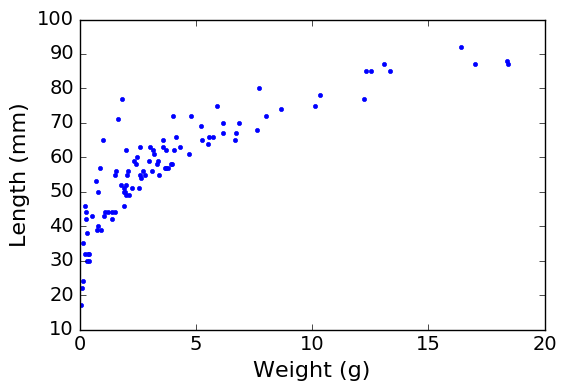

In [3]:
plt.plot(weight,length,'.')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Weight (g)",fontsize=16)
plt.ylabel("Length (mm)",fontsize=16)
None

We notice immediately that the two variables do seem to be related, but that it's not a linear relationship.

### Part B

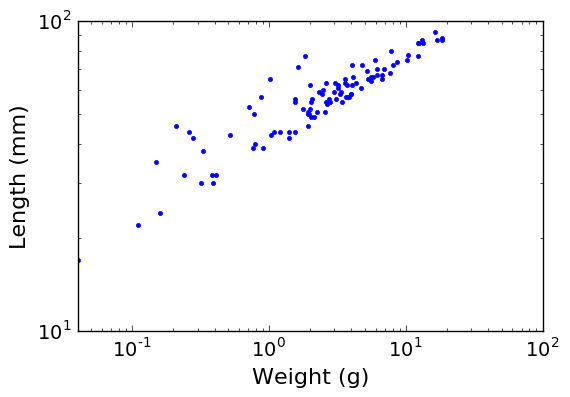

In [4]:
plt.loglog(weight,length,'.')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Weight (g)",fontsize=16)
plt.ylabel("Length (mm)",fontsize=16)
plt.axis([min(1e-1,weight.min()),max(1e2,weight.max()),min(1e1,length.min()),max(1e2,length.max())])
None

Switching to a log scale makes a linear relationship very apparent for the log of the values.

### Part C

There are a handful of points that don't fit the pattern, as evidenced by their distance from a fitted line. The plot below identifies these for this data set, where I've evaluated the points with a residual greater than two standard deviations from the fit residuals. For the particular way that I've created these data points, they appear to primarily be greater lengths than expected for the weight, but since this is just a random data set that is meaningless.

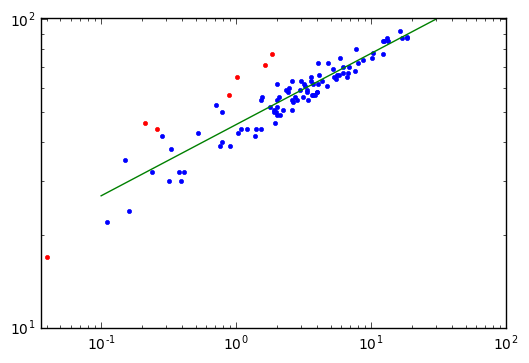

In [5]:
from scipy.stats import linregress
lr = linregress(np.log10(weight),np.log10(length))
residual = np.log10(length)-lr.slope*np.log10(weight)+lr.intercept

mask = (residual > residual.mean()+2*residual.std()) | (residual < residual.mean()-2*residual.std())

plt.loglog(weight[~mask],length[~mask],'b.')
plt.plot(weight[mask],length[mask],'r.')

x=np.linspace(1e-1,3e1,1000)
plt.plot(x,10**lr.intercept*x**lr.slope,'g-')
plt.axis([min(1e-1,0.9*weight.min()),max(1e2,1.1*weight.max()),min(1e1,0.9*length.min()),max(1e2,1.1*length.max())])
None